# Import Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys


sys.path.append('../analysis_scripts')

In [2]:
data_oc_df = pd.read_csv('/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Data/analysed_signal.csv')
data_mb_df = pd.read_csv('/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Data/analysed_background.csv')

In [3]:
data_oc_df = data_oc_df.drop(['n_event'], axis=1)
mass_mask = (data_oc_df['mass_Lc'] > 2.24763) & ( data_oc_df['mass_Lc'] < 2.32497) & (data_oc_df['true_decay'] == 1)
data_oc_df = data_oc_df[mass_mask]
data_oc_df['tag'] = 'Sig'

data_mb_df = data_mb_df.drop(['n_event'], axis=1)
mass_mask = (data_mb_df['mass_Lc'] > 2.24763) & ( data_mb_df['mass_Lc'] < 2.32497)
data_mb_df = data_mb_df[mass_mask]
data_mb_df['tag'] = 'Bg'

raw_df = pd.concat([data_oc_df, data_mb_df], axis=0).reset_index(drop=True)

raw_df['cosAngle_r_Lc_momentum_Lc'] = raw_df['cosAngle_r_Lc_momentum_Lc'].apply(np.cos)
raw_df['cosAngle_r_Lc_sum_momentum'] = raw_df['cosAngle_r_Lc_sum_momentum'].apply(np.cos)
raw_df['cosAngle_momentum_Lc_sum_momentum'] = raw_df['cosAngle_momentum_Lc_sum_momentum'].apply(np.cos)

raw_df['cosAngle_r_Lc_momentum_Lc_left'] = raw_df.loc[raw_df['cosAngle_r_Lc_momentum_Lc'] < 0, 'cosAngle_r_Lc_momentum_Lc']
raw_df['cosAngle_r_Lc_momentum_Lc_right'] = raw_df.loc[raw_df['cosAngle_r_Lc_momentum_Lc'] > 0, 'cosAngle_r_Lc_momentum_Lc']

raw_df['cosAngle_r_Lc_sum_momentum_left'] = raw_df.loc[raw_df['cosAngle_r_Lc_sum_momentum'] < 0, 'cosAngle_r_Lc_sum_momentum']
raw_df['cosAngle_r_Lc_sum_momentum_right'] = raw_df.loc[raw_df['cosAngle_r_Lc_sum_momentum'] > 0, 'cosAngle_r_Lc_sum_momentum']

# Preselection

In [4]:
from selection_scripts import auto_preselection


proc_df = raw_df.copy()

feature_to_remove = ['mass_Lc', 'cosAngle_r_Lc_momentum_Lc', 'cosAngle_r_Lc_sum_momentum',
                     'phi_angle', 'multiplicity', 'Lc_diff_x', 'Lc_diff_y', 'Lc_diff_z',
                     'PV_diff_x', 'PV_diff_y', 'PV_diff_z', 'PV_diff_ES_x', 'PV_diff_ES_y',
                     'PV_diff_ES_z', 'true_decay', 'tag']

features_to_select = list(proc_df.columns)

for feature in feature_to_remove:
    features_to_select.remove(feature)

selection_df, mask = auto_preselection(
    df=proc_df,
    features=features_to_select,
    safety_interval=0.9,
    indent=2,
    quantile_left=1e-2,
    quantile_right=1-1e-2,
    recursive=True
)

proc_df = proc_df.query(mask)

# PV FIT

### PV x-axis

Method: Nelder-Mead
Fit problems!
Optimization result:
Success: False
Message: Maximum number of iterations has been exceeded.
Number of iterations: 1000
Final objective value: 138.796392
Chi-squared: 138.80
Reduced chi-squared: 4.206
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 8315.6378 +- 158.8021
         mu = 0.000006 +- 0.000032
         sigma = 0.003612 +- 0.000062
Gauss 2: A = 1536.5848 +- 173.3735
         mu = -0.000030 +- 0.000098
         sigma = 0.007406 +- 0.000220
Constant: C = 0.0517 +- 1.5935
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000000 +- 0.000031
Effective Sigma: 0.004423 +- 0.000101
Success: False
Method: Powell
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 19
Final objective value: 99.004908
Chi-squared: 99.00
Reduced chi-squared: 3.000
--------------------------------------------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 367
Final objective value: 26925.716036
Chi-squared: 26925.72
Reduced chi-squared: 815.931
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 8.0195 +- 60.7524
         mu = -77.278363 +- 593.127101
         sigma = 120.809777 +- 904.410848
Gauss 2: A = 2613.6104 +- 505.1278
         mu = -0.000011 +- 0.000676
         sigma = 0.006831 +- 0.000567
Constant: C = 2.0146 +- 91.5683
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.236403 +- 2.545854
Effective Sigma: 6.681736 +- 56.028168
Success: False
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 66
Final objective value: 1599.185493
Chi-squared: nan
Reduced chi-squared: nan
---------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:520: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(


Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objective value: 67513.431932
Chi-squared: 67513.43
Reduced chi-squared: 2045.862
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 28.2713 +- 218.0157
         mu = -0.001019 +- 0.020959
         sigma = 0.015539 +- 0.028868
Gauss 2: A = 26.5173 +- nan
         mu = -0.001329 +- 0.020594
         sigma = 0.016794 +- 0.020164
Constant: C = 5.5302 +- 67.4822
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.001169 +- nan
Effective Sigma: 0.016159 +- nan
Success: False
Method: SLSQP
Skip method: SLSQP
Method: trust-constr


/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:520: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 430
Final objective value: 100.901831
Chi-squared: 100.90
Reduced chi-squared: 3.058
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 7796.4062 +- 190.1431
         mu = 0.000011 +- 0.000031
         sigma = 0.003461 +- 0.000063
Gauss 2: A = 2102.2219 +- 205.6077
         mu = -0.000030 +- 0.000071
         sigma = 0.006778 +- 0.000164
Constant: C = 6.9162 +- 1.2004
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000003 +- 0.000028
Effective Sigma: 0.004381 +- 0.000093
Success: True
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: trust-ncg
Method: trust-exact
Skip method: trust-exact
Method: trust-krylov
Skip method: trust-krylov
********************************************************************************
**************************************************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


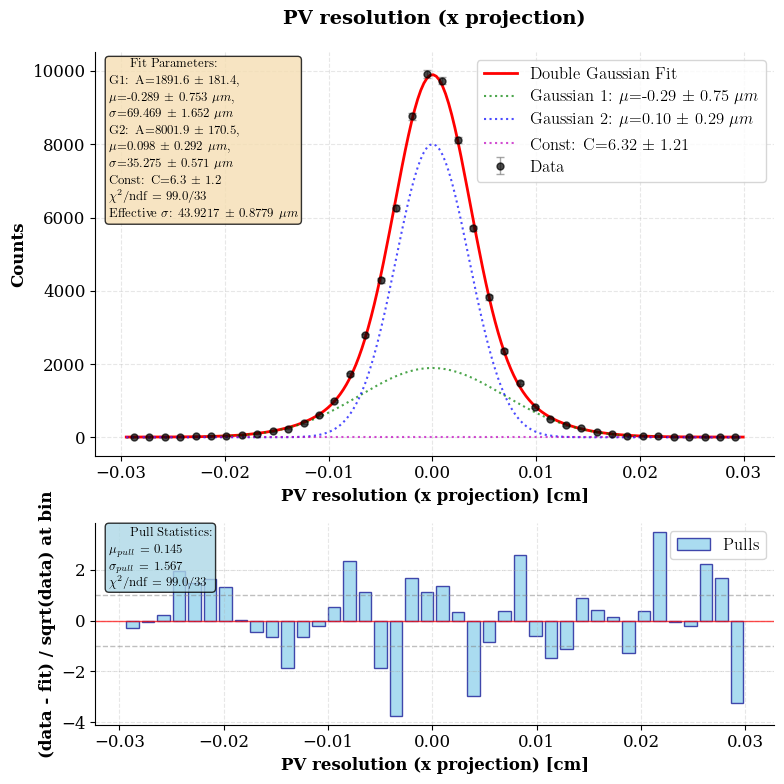

In [ ]:
from fit_scripts import fit_distr_double_gauss


# proc_df = raw_df.copy()

distr_name = 'PV_diff_ES_x'

sig_PV_df = proc_df.loc[proc_df['tag'] == 'Sig', distr_name].copy()

sig_PV_df_sel = sig_PV_df[abs(sig_PV_df) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (x projection)',
    x_label='PV resolution (x projection) [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### PV y-axis

Method: Nelder-Mead
Fit problems!
Optimization result:
Success: False
Message: Maximum number of iterations has been exceeded.
Number of iterations: 1000
Final objective value: 196.563986
Chi-squared: 196.56
Reduced chi-squared: 5.956
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1287.7385 +- 182.6285
         mu = -0.000729 +- 0.000176
         sigma = 0.007568 +- 0.000266
Gauss 2: A = 8565.8944 +- 171.1974
         mu = 0.000104 +- 0.000038
         sigma = 0.003677 +- 0.000070
Constant: C = 0.3371 +- 2.1557
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000005 +- 0.000042
Effective Sigma: 0.004386 +- 0.000113
Success: False
Method: Powell
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 24
Final objective value: 70.407877
Chi-squared: 70.41
Reduced chi-squared: 2.134
-------------------------------------------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Maximum number of iterations has been exceeded.
Number of iterations: 1000
Final objective value: 33270.813584
Chi-squared: 33270.81
Reduced chi-squared: 1008.206
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1012.7684 +- 725.4067
         mu = -0.000033 +- 0.001738
         sigma = 0.007245 +- 0.001461
Gauss 2: A = 1013.9560 +- 725.1747
         mu = -0.000033 +- 0.001736
         sigma = -0.007245 +- 0.001460
Constant: C = 7.0068 +- 21.4460
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000033 +- 0.001228
Effective Sigma: 0.007245 +- 0.001033
Success: False
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 49
Final objective value: 1499.547781
Chi-squared: 1499.55
Reduced chi-squared: 45.441
-----------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:520: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))


Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objective value: 66883.042934
Chi-squared: 66883.04
Reduced chi-squared: 2026.759
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 28.8368 +- nan
         mu = 0.000206 +- 0.016542
         sigma = 0.012664 +- 0.014518
Gauss 2: A = 41.0425 +- nan
         mu = 0.000053 +- 0.014420
         sigma = 0.012562 +- 0.012292
Constant: C = 14.4257 +- 53.1045
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000116 +- nan
Effective Sigma: 0.012604 +- nan
Success: False
Method: SLSQP
Skip method: SLSQP
Method: trust-constr


/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:520: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Fit problems!
Optimization result:
Success: False
Message: The maximum number of function evaluations is exceeded.
Number of iterations: 1000
Final objective value: 71.508793
Chi-squared: 71.51
Reduced chi-squared: 2.167
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1860.2413 +- 123.8271
         mu = -0.000067 +- 0.000065
         sigma = 0.006906 +- 0.000114
Gauss 2: A = 8073.4304 +- 117.0038
         mu = 0.000026 +- 0.000025
         sigma = 0.003520 +- 0.000041
Constant: C = 7.1010 +- 1.0805
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000009 +- 0.000024
Effective Sigma: 0.004359 +- 0.000060
Success: False
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: trust-ncg
Method: trust-exact
Skip method: trust-exact
Method: trust-krylov
Skip method: trust-krylov
********************************************************************************
**********************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


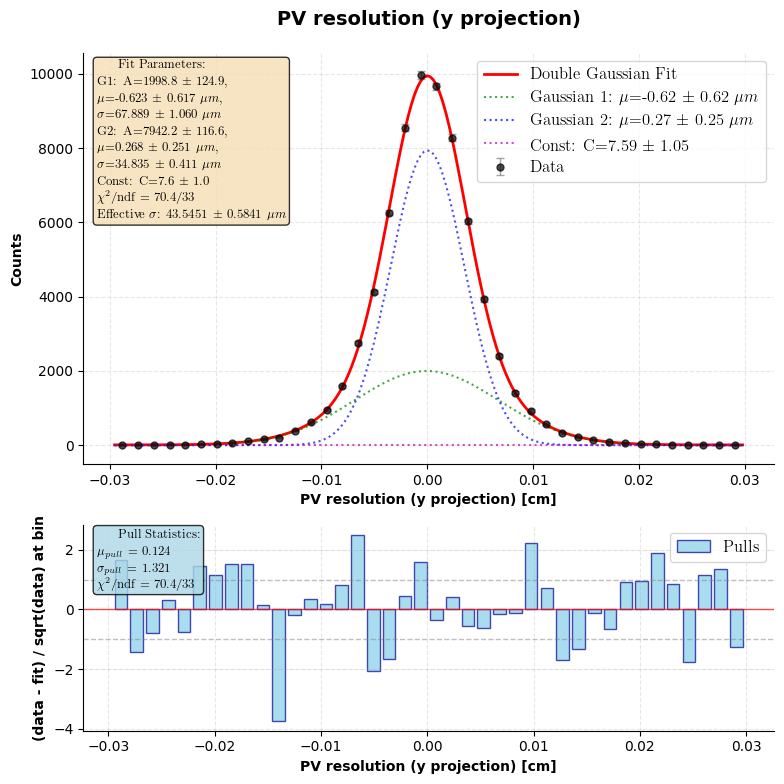

In [ ]:
from fit_scripts import fit_distr_double_gauss


# proc_df = raw_df.copy()

distr_name = 'PV_diff_ES_y'

sig_PV_df = proc_df.loc[proc_df['tag'] == 'Sig', distr_name].copy()

sig_PV_df_sel = sig_PV_df[abs(sig_PV_df) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (y projection)',
    x_label='PV resolution (y projection) [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### PV z-axis

Method: Nelder-Mead
Fit problems!
Optimization result:
Success: False
Message: Maximum number of iterations has been exceeded.
Number of iterations: 1000
Final objective value: 223.284040
Chi-squared: 223.28
Reduced chi-squared: 6.766
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 8037.8257 +- 98.1040
         mu = 0.000050 +- 0.000040
         sigma = 0.004254 +- 0.000054
Gauss 2: A = 699.2033 +- 74.2348
         mu = -0.000193 +- 0.000206
         sigma = 0.009814 +- 0.000348
Constant: C = 2.2065 +- 4.2674
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000031 +- 0.000040
Effective Sigma: 0.004935 +- 0.000094
Success: False
Method: Powell
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 33
Final objective value: 65.643882
Chi-squared: 65.64
Reduced chi-squared: 1.989
-----------------------------------------------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 571
Final objective value: 30085.050104
Chi-squared: 30085.05
Reduced chi-squared: 911.668
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 2064.6253 +- 440.3380
         mu = -0.000034 +- 0.000871
         sigma = -0.007871 +- 0.000785
Gauss 2: A = 87.8127 +- nan
         mu = 453.819047 +- nan
         sigma = 316.018058 +- nan
Constant: C = -16.3621 +- nan
------------------------------------------------------------
Derived quantities:
Effective Mean: 18.514361 +- nan
Effective Sigma: 63.830065 +- nan
Success: False
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 54
Final objective value: 1469.984681
Chi-squared: nan
Reduced chi-squared: nan
-------------------------------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:520: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:520: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))


Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objective value: 65866.382860
Chi-squared: 65866.38
Reduced chi-squared: 1995.951
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 34.3455 +- 815.5888
         mu = -0.000459 +- 0.018858
         sigma = 0.014766 +- 0.018632
Gauss 2: A = 32.4639 +- 832.2892
         mu = -0.000130 +- 0.019293
         sigma = 0.014572 +- 0.019078
Constant: C = 28.8245 +- 91.0272
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000299 +- 0.013790
Effective Sigma: 0.014672 +- 0.013438
Success: False
Method: SLSQP
Skip method: SLSQP
Method: trust-constr


/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 410
Final objective value: 75.677982
Chi-squared: 75.68
Reduced chi-squared: 2.293
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 2179.1337 +- 149.9233
         mu = -0.000080 +- 0.000064
         sigma = 0.007248 +- 0.000134
Gauss 2: A = 6845.9257 +- 141.8703
         mu = 0.000031 +- 0.000031
         sigma = 0.003712 +- 0.000054
Constant: C = 16.8535 +- 1.7356
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000004 +- 0.000028
Effective Sigma: 0.004810 +- 0.000079
Success: True
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: trust-ncg
Method: trust-exact
Skip method: trust-exact
Method: trust-krylov
Skip method: trust-krylov
********************************************************************************
***************************************************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


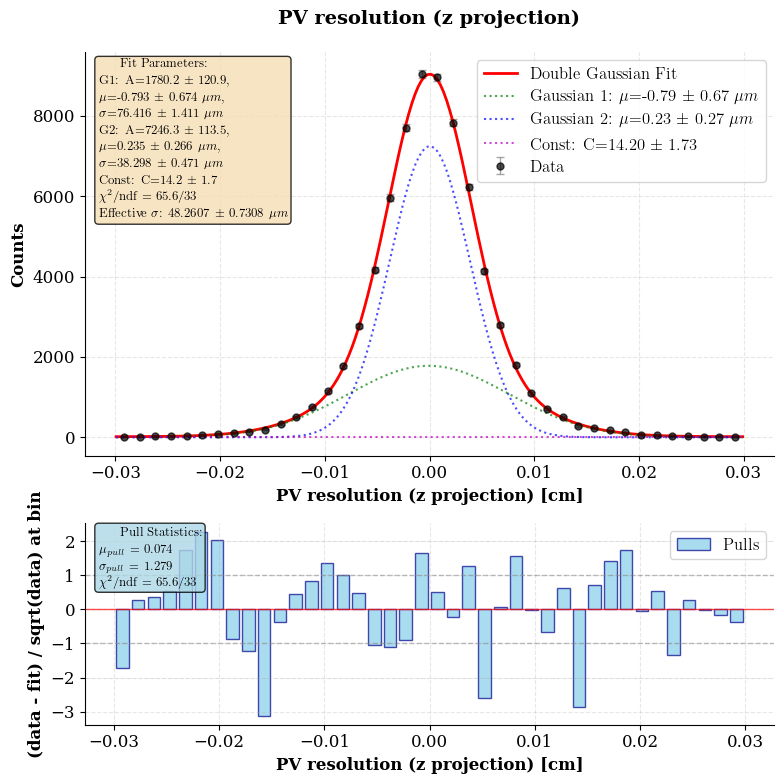

In [ ]:
from fit_scripts import fit_distr_double_gauss


# proc_df = raw_df.copy()

distr_name = 'PV_diff_ES_z'

sig_PV_df = proc_df.loc[proc_df['tag'] == 'Sig', distr_name].copy()

sig_PV_df_sel = sig_PV_df[abs(sig_PV_df) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (z projection)',
    x_label='PV resolution (z projection) [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

plt.savefig(f'../plots/{distr_name}_Sig.pdf')

# SV FIT

### SV x-axis

Method: Nelder-Mead
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 474
Final objective value: 63792.696834
Chi-squared: 63792.70
Reduced chi-squared: 1933.112
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 126.8517 +- 383.0619
         mu = 0.029240 +- 0.016810
         sigma = 0.029173 +- 0.037706
Gauss 2: A = 130.0860 +- 382.5722
         mu = -0.029105 +- 0.015947
         sigma = 0.029173 +- 0.036741
Constant: C = 0.0000 +- 476.5922
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000299 +- 0.062555
Effective Sigma: 0.029173 +- 0.026317
Success: True
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
Optimization re

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:520: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:379: RuntimeWarning: invalid value encountered in sqrt
  effective_sigma = np.sqrt(effective_variance)
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 192
Final objective value: 6960.726160
Chi-squared: 6960.73
Reduced chi-squared: 210.931
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 3952.8694 +- 298.1320
         mu = -0.000019 +- 0.000332
         sigma = 0.007598 +- 0.000325
Gauss 2: A = -33.4310 +- 602.8857
         mu = 238.292420 +- 9638.979373
         sigma = -36.460552 +- nan
Constant: C = 58.8209 +- 22.5439
------------------------------------------------------------
Derived quantities:
Effective Mean: -2.032542 +- 90.144445
Effective Sigma: nan
Success: False
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 117
Final objective value: 1314.699182
Chi-squared: 1314.70
Reduced chi-squared: 39.839
----------------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:520: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:379: RuntimeWarning: invalid value encountered in sqrt
  effective_sigma = np.sqrt(effective_variance)
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(


Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objective value: 58786.524610
Chi-squared: 58786.52
Reduced chi-squared: 1781.410
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 179.5627 +- nan
         mu = -0.000008 +- 0.007697
         sigma = 0.017208 +- 0.011517
Gauss 2: A = 72.0574 +- nan
         mu = -0.000019 +- 0.014025
         sigma = 0.017206 +- 0.018248
Constant: C = 8.8665 +- 195.5544
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000011 +- nan
Effective Sigma: 0.017207 +- nan
Success: False
Method: SLSQP
Skip method: SLSQP
Method: trust-constr


/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:520: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 572
Final objective value: 35.556801
Chi-squared: 35.56
Reduced chi-squared: 1.077
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 2525.0339 +- 98.2954
         mu = -0.000032 +- 0.000043
         sigma = 0.008627 +- 0.000104
Gauss 2: A = 4570.9456 +- 93.5611
         mu = -0.000009 +- 0.000032
         sigma = 0.004247 +- 0.000062
Constant: C = 22.2130 +- 2.4774
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000017 +- 0.000025
Effective Sigma: 0.006173 +- 0.000074
Success: True
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: trust-ncg
Method: trust-exact
Skip method: trust-exact
Method: trust-krylov
Skip method: trust-krylov
********************************************************************************
***************************************************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


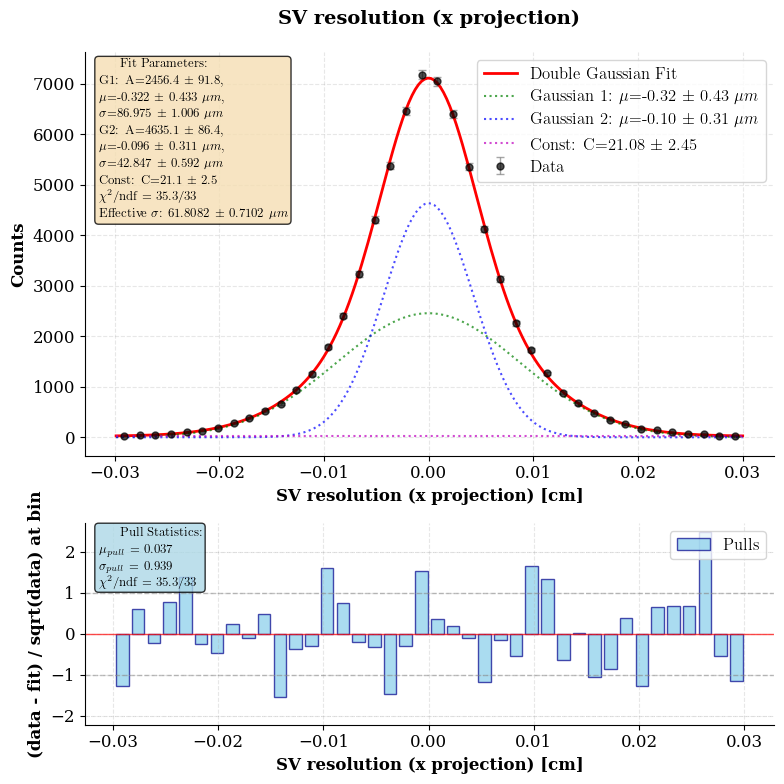

In [ ]:
from fit_scripts import fit_distr_double_gauss


# proc_df = raw_df.copy()

distr_name = 'Lc_diff_x'

sig_PV_df = proc_df.loc[proc_df['tag'] == 'Sig', distr_name].copy()

sig_PV_df_sel = sig_PV_df[abs(sig_PV_df) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='SV resolution (x projection)',
    x_label='SV resolution (x projection) [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

plt.savefig(f'../plots/{distr_name}.pdf')

### SV y-axis

Method: Nelder-Mead
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 433
Final objective value: 63501.820860
Chi-squared: 63501.82
Reduced chi-squared: 1924.298
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 142.2662 +- 428.6755
         mu = 0.029185 +- 0.017797
         sigma = 0.029167 +- 0.037308
Gauss 2: A = 125.2129 +- 423.5043
         mu = -0.029149 +- 0.021324
         sigma = 0.029167 +- 0.041512
Constant: C = 0.0000 +- 530.7834
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.001878 +- 0.067215
Effective Sigma: 0.029167 +- 0.027774
Success: True
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
Optimization res

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 228
Final objective value: 18177.461924
Chi-squared: 18177.46
Reduced chi-squared: 550.832
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 2529.7284 +- 346.8954
         mu = -0.000005 +- 0.000692
         sigma = 0.008510 +- 0.000605
Gauss 2: A = 173.8033 +- 1234.1638
         mu = -143.078819 +- 2467.437461
         sigma = -21.810578 +- 1233.546225
Constant: C = 73.3277 +- 39.7883
------------------------------------------------------------
Derived quantities:
Effective Mean: -9.198186 +- 169.996031
Effective Sigma: 5.530074 +- 313.304402
Success: False
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 35
Final objective value: 1222.913247
Chi-squared: 1222.91
Reduced chi-squared: 37.0

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:520: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(


Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objective value: 58484.654934
Chi-squared: 58484.65
Reduced chi-squared: 1772.262
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 104.9300 +- nan
         mu = 0.000208 +- 0.009548
         sigma = 0.013863 +- 0.008894
Gauss 2: A = 106.8614 +- nan
         mu = 0.000237 +- 0.008339
         sigma = 0.013872 +- 0.008932
Constant: C = 73.3293 +- 96.4688
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000223 +- nan
Effective Sigma: 0.013868 +- nan
Success: False
Method: SLSQP
Skip method: SLSQP
Method: trust-constr


/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:520: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 489
Final objective value: 44.912599
Chi-squared: 44.91
Reduced chi-squared: 1.361
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 4563.0343 +- 122.8085
         mu = 0.000014 +- 0.000036
         sigma = 0.004211 +- 0.000080
Gauss 2: A = 2582.6553 +- 131.1862
         mu = -0.000027 +- 0.000048
         sigma = 0.008445 +- 0.000126
Constant: C = 27.3516 +- 2.8450
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000001 +- 0.000029
Effective Sigma: 0.006091 +- 0.000093
Success: True
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: trust-ncg
Method: trust-exact
Skip method: trust-exact
Method: trust-krylov
Skip method: trust-krylov
********************************************************************************
**************************************************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:435: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


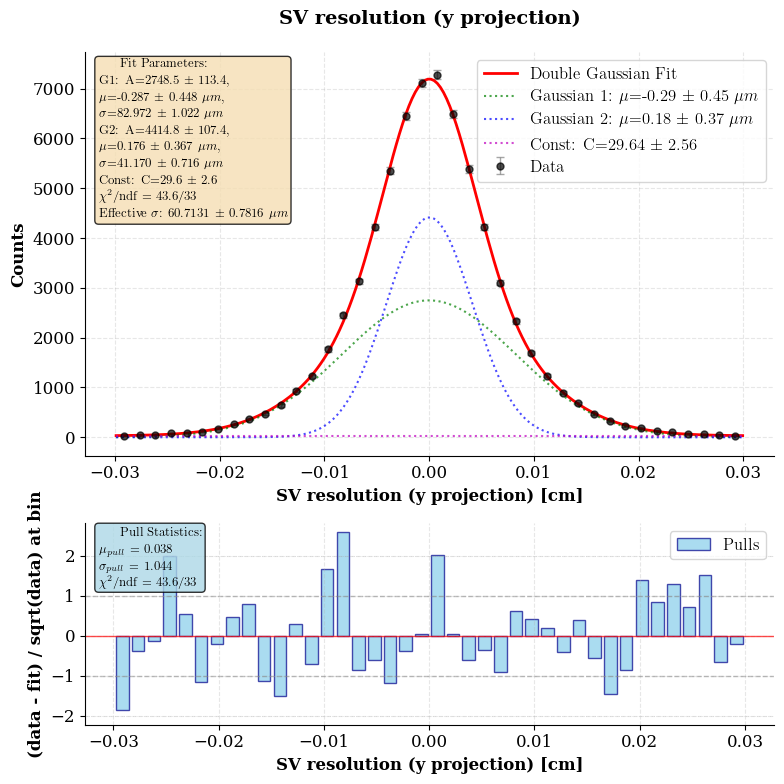

In [ ]:
from fit_scripts import fit_distr_double_gauss


# proc_df = raw_df.copy()

distr_name = 'Lc_diff_y'

sig_PV_df = proc_df.loc[proc_df['tag'] == 'Sig', distr_name].copy()

sig_PV_df_sel = sig_PV_df[abs(sig_PV_df) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='SV resolution (y projection)',
    x_label='SV resolution (y projection) [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

plt.savefig(f'../plots/{distr_name}.pdf')

# PV z-axis

Method: Nelder-Mead
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 487
Final objective value: 55121.846210
Chi-squared: nan
Reduced chi-squared: nan
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 429.7035 +- nan
         mu = 0.000923 +- nan
         sigma = 0.029237 +- nan
Gauss 2: A = 0.0000 +- nan
         mu = -0.029247 +- nan
         sigma = 0.029237 +- nan
Constant: C = 0.0000 +- nan
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000923 +- nan
Effective Sigma: 0.029237 +- nan
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
Optimization result:
Success: True
Message: Optimization terminated successfully.
Numbe

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:378: RuntimeWarning: invalid value encountered in sqrt
  effective_sigma = np.sqrt(effective_variance)
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 206
Final objective value: 7412.798709
Chi-squared: 7412.80
Reduced chi-squared: 224.630
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = -10.1247 +- nan
         mu = 240.845198 +- 0.103025
         sigma = 41.317389 +- nan
Gauss 2: A = 3613.5926 +- 32.2714
         mu = -0.000048 +- 0.000376
         sigma = 0.007875 +- 0.000317
Constant: C = 116.1746 +- 32.2150
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.676752 +- nan
Effective Sigma: nan
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 55
Final objective value: 1264.778226
Chi-squared: 1264.78
Reduced chi-squared: 38.327
-----------------------------------------------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))


Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objective value: 55810.725880
Chi-squared: 55810.73
Reduced chi-squared: 1691.234
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 145.3311 +- 819.6773
         mu = 0.000279 +- 0.010069
         sigma = 0.018965 +- 0.016921
Gauss 2: A = 110.9954 +- 906.6655
         mu = 0.000271 +- 0.011939
         sigma = 0.018969 +- 0.019413
Constant: C = 48.8849 +- 275.9385
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000276 +- 0.007702
Effective Sigma: 0.018967 +- 0.012756
Method: SLSQP
Skip method: SLSQP
Method: trust-constr


/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 445
Final objective value: 26.745924
Chi-squared: 26.75
Reduced chi-squared: 0.810
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 4355.7180 +- 74.8184
         mu = -0.000024 +- 0.000028
         sigma = 0.004286 +- 0.000053
Gauss 2: A = 2410.7135 +- 77.0981
         mu = -0.000062 +- 0.000040
         sigma = 0.009041 +- 0.000103
Constant: C = 51.7807 +- 3.2410
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000037 +- 0.000023
Effective Sigma: 0.006399 +- 0.000070
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: trust-ncg
Method: trust-exact
Skip method: trust-exact
Method: trust-krylov
Skip method: trust-krylov
********************************************************************************
*****************************************************************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


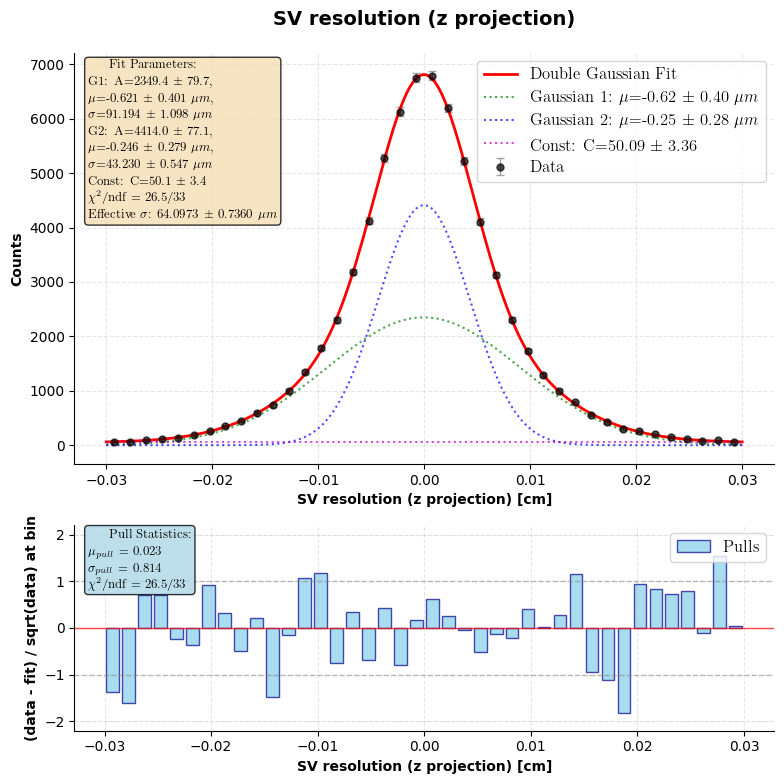

In [5]:
from fit_scripts import fit_distr_double_gauss


# proc_df = raw_df.copy()

distr_name = 'Lc_diff_z'

sig_PV_df = proc_df.loc[proc_df['tag'] == 'Sig', distr_name].copy()

sig_PV_df_sel = sig_PV_df[abs(sig_PV_df) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='SV resolution (z projection)',
    x_label='SV resolution (z projection) [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

plt.savefig(f'../plots/{distr_name}.pdf')

# Background fit

array([[<Axes: title={'center': 'mass_Lc'}>]], dtype=object)

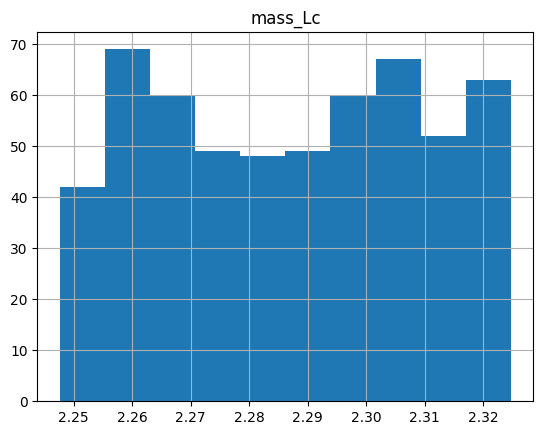

In [6]:
mass_bg = pd.read_csv('/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Data/mass_Bg_after_selection.csv')
mass_bg.hist()

Method: Nelder-Mead
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 29
Final objective value: 53.602616
Chi-squared: 53.60
Reduced chi-squared: 1.374
------------------------------------------------------------
Fit parameters with errors:
Constant: C = 12.6350 +- 0.4659
result['success']=True
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 2
Final objective value: 53.602616
Chi-squared: 53.60
Reduced chi-squared: 1.374
------------------------------------------------------------
Fit parameters with errors:
Constant: C = 12.6349 +- 0.4659
result['success']=True
************************************************************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:816: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:816: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:816: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:816: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(
/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using 

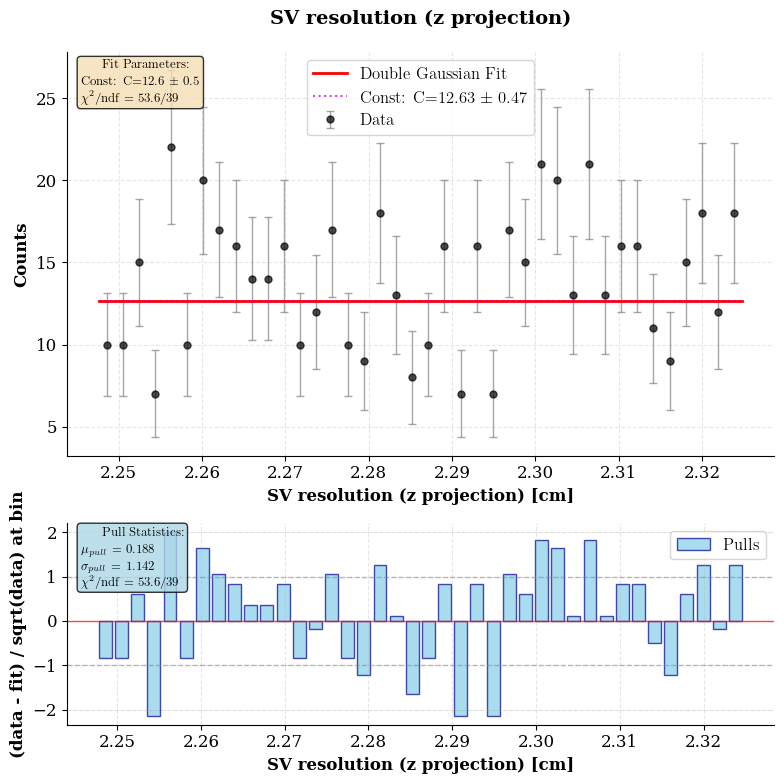

In [8]:
from fit_scripts import fit_distr_flat_bg


# proc_df = raw_df.copy()

distr_name = 'Background'

distr = mass_bg

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    # if method in ('SLSQP'):
    #     print(f'Skip method: {method}')
    #     continue

    try:
        fit_res = fit_distr_flat_bg(
            distr=distr,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    print(f'{result['success']=}')
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_flat_bg(
    distr=distr,
    title='SV resolution (z projection)',
    x_label='SV resolution (z projection) [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

plt.savefig(f'../plots/{distr_name}.pdf')

<Axes: >

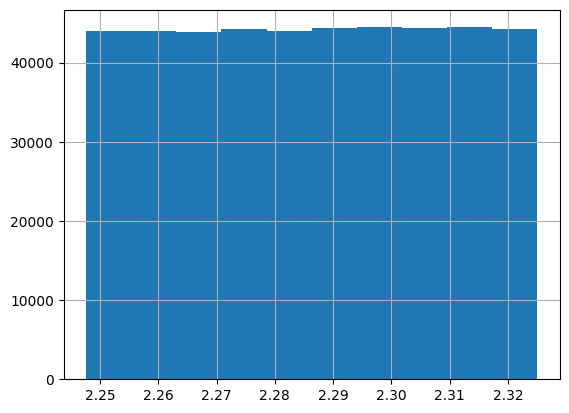

In [14]:
raw_df.loc[raw_df.tag == 'Bg', 'mass_Lc'].hist()